# Global Climate Events and Economic Impact

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuração básica para o Seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamanho padrão para os gráficos

# Set the path to the file in your Colab environment
file_path = "/content/global_climate_events_economic_impact_2020_2025.csv"

# Load the CSV file into a pandas DataFrame
df_completo = pd.read_csv(file_path)

df_completo.head()

,event_id,date,year,month,country,event_type,severity,duration_days,affected_population,deaths,injuries,economic_impact_million_usd,infrastructure_damage_score,response_time_hours,international_aid_million_usd,latitude,longitude,total_casualties,impact_per_capita,aid_percentage
0,EV01539,2020-01-01,2020,1,Japan,Tsunami,1,1,420956,0,2,0.01,4.9,11,0.0,85.4321,138.7206,2,0.02,0.0
1,EV02303,2020-01-01,2020,1,Qatar,Hurricane,1,4,3276,1,10,0.00,3.4,5,0.0,-32.0370,14.0111,11,0.00,0.0
2,EV01796,2020-01-02,2020,1,Canada,Drought,3,6,120382,0,9,0.10,8.9,10,0.0,78.4213,-112.7556,9,0.83,0.0
3,EV00175,2020-01-02,2020,1,Poland,Heatwave,6,16,185527,2,37,1.27,17.8,7,0.0,73.6564,115.0650,39,6.85,0.0
4,EV01115,2020-01-03,2020,1,UAE,Wildfire,4,16,176642,2,27,2.01,18.7,17,0.0,52.6458,101.5023,29,11.38,0.0


In [ ]:
# Definir a lista de colunas que serão utilizadas no projeto
colunas_principais = [
    'event_id',
    'date',
    'country',
    'event_type',
    'severity',
    'deaths',
    'injuries',
    'total_casualties',
    'economic_impact_million_usd',
    'infrastructure_damage_score',
    'response_time_hours',
    'international_aid_million_usd',
    'impact_per_capita',
    'affected_population'
]

# Criar um novo DataFrame ('df') selecionando apenas essas colunas do DataFrame original ('df_completo')
df = df_completo[colunas_principais]


df['date'] = pd.to_datetime(df['date'])


/tmp/ipython-input-1282278514.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
# Visualizar as primeiras 5 linhas
print("--- Primeiras Linhas ---")
print(df.head())

# Obter informações resumidas sobre o DataFrame (tipos de dados e valores não-nulos)
print("\n--- Informações do DataFrame ---")
print(df.info())

# Obter estatísticas descritivas das colunas numéricas
print("\n--- Estatísticas Descritivas ---")
print(df.describe())

--- Primeiras Linhas ---
  event_id        date country event_type  severity  deaths  injuries  \
0  EV01539  2020-01-01   Japan    Tsunami         1       0         2   
1  EV02303  2020-01-01   Qatar  Hurricane         1       1        10   
2  EV01796  2020-01-02  Canada    Drought         3       0         9   
3  EV00175  2020-01-02  Poland   Heatwave         6       2        37   
4  EV01115  2020-01-03     UAE   Wildfire         4       2        27   

   total_casualties  economic_impact_million_usd  infrastructure_damage_score  \
0                 2                         0.01                          4.9   
1                11                         0.00                          3.4   
2                 9                         0.10                          8.9   
3                39                         1.27                         17.8   
4                29                         2.01                         18.7   

   response_time_hours  international_aid_million

In [ ]:
# Checar a quantidade de valores ausentes por coluna
print("--- Quantidade de Valores Ausentes (NaNs) ---")
print(df.isnull().sum().sort_values(ascending=False))

--- Quantidade de Valores Ausentes (NaNs) ---
event_id                         0
date                             0
country                          0
event_type                       0
severity                         0
deaths                           0
injuries                         0
total_casualties                 0
economic_impact_million_usd      0
infrastructure_damage_score      0
response_time_hours              0
international_aid_million_usd    0
impact_per_capita                0
affected_population              0
dtype: int64


In [ ]:
# Colunas numéricas importantes para checagem e análise
cols_numericas = [
    # Métricas de Impacto Financeiro
    'economic_impact_million_usd',
    'international_aid_million_usd',
    'impact_per_capita',

    # Métricas de Impacto Humano
    'total_casualties',
    'deaths',
    'injuries',
    'affected_population',

    # Métricas de Caracterização do Evento
    'severity',
    'infrastructure_damage_score',
    'response_time_hours',
]

print("--- Verificação de Valores Não Numéricos/Strings Vazias ---")

# Criamos uma cópia temporária forçando a conversão
df_temp = df[cols_numericas].copy()
for col in cols_numericas:
    # Tenta converter para numérico, se falhar, retorna NaN (ou seja, detecta o "vazio" ou "?")
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')

    # Conta quantos NaNs foram criados (indicando falha na conversão)
    erros = df_temp[col].isnull().sum()

    if erros > 0:
        print(f"ATENÇÃO: A coluna '{col}' possui {erros} valores que não são números válidos (podem ser strings vazias ou caracteres inválidos).")
    else:
        print(f"Coluna '{col}' está limpa.")

--- Verificação de Valores Não Numéricos/Strings Vazias ---
Coluna 'economic_impact_million_usd' está limpa.
Coluna 'international_aid_million_usd' está limpa.
Coluna 'impact_per_capita' está limpa.
Coluna 'total_casualties' está limpa.
Coluna 'deaths' está limpa.
Coluna 'injuries' está limpa.
Coluna 'affected_population' está limpa.
Coluna 'severity' está limpa.
Coluna 'infrastructure_damage_score' está limpa.
Coluna 'response_time_hours' está limpa.


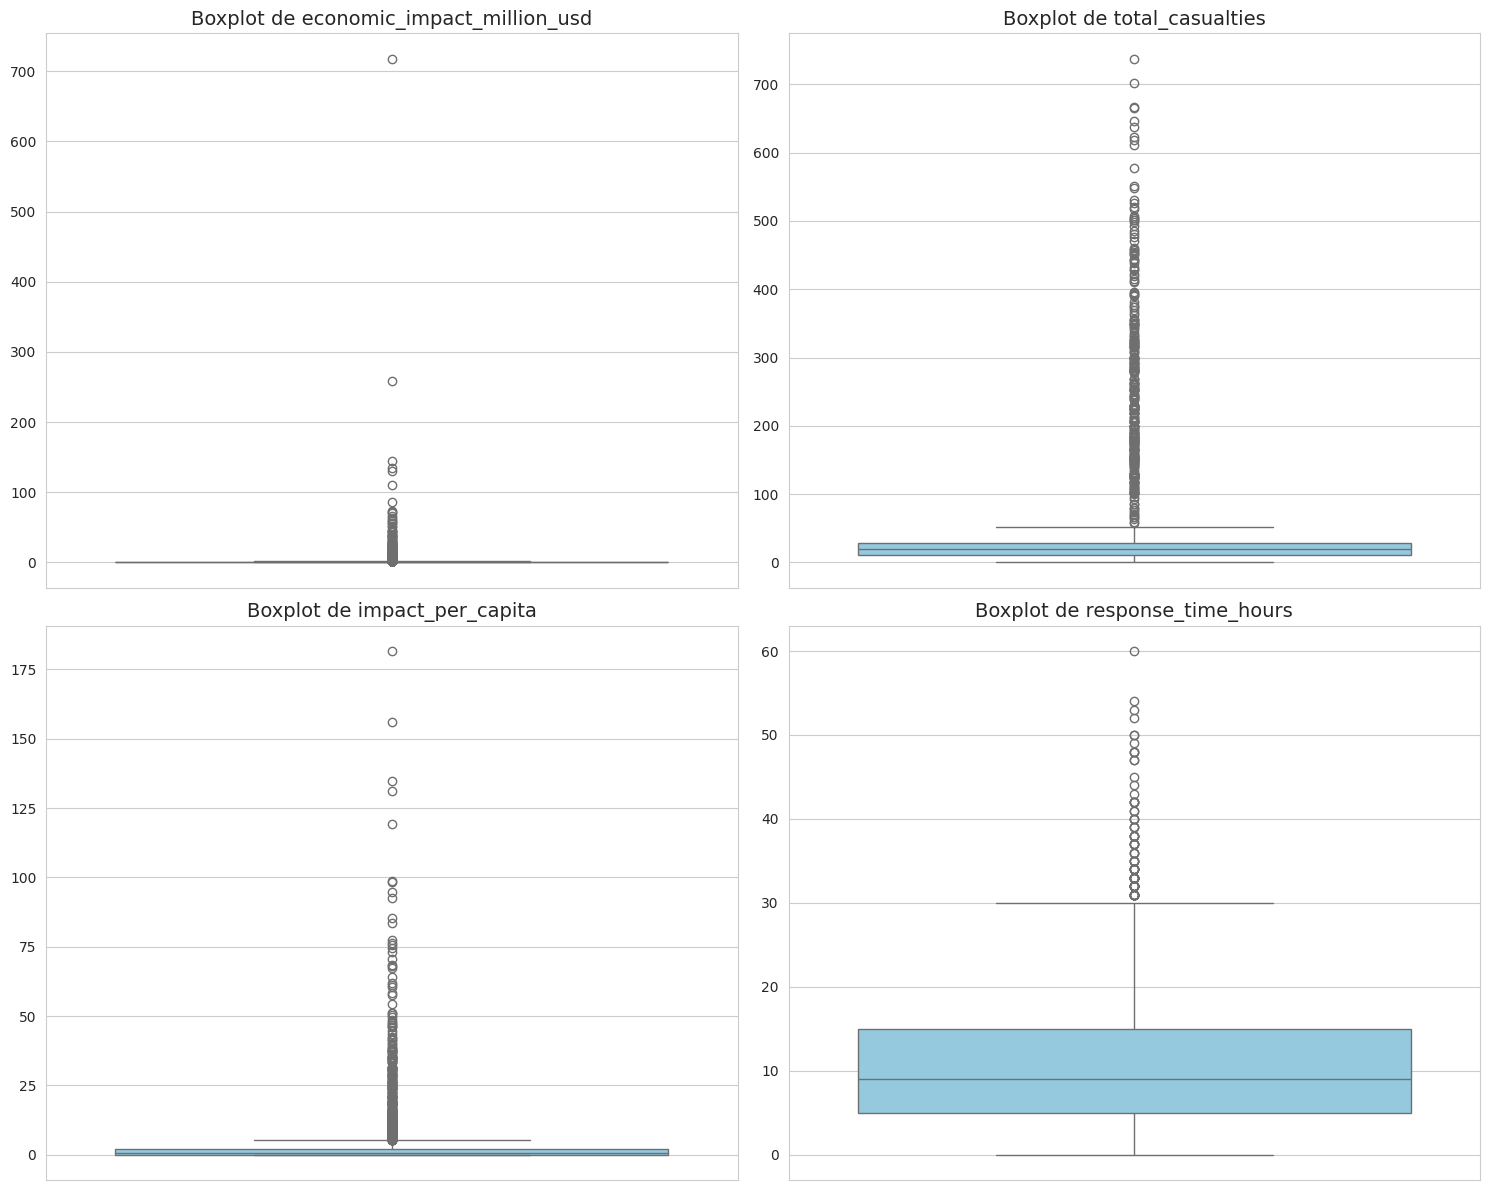

In [ ]:
# Variáveis críticas para checagem de outliers
cols_outliers = [
    'economic_impact_million_usd',
    'total_casualties',
    'impact_per_capita',
    'response_time_hours'
]

# Configuração para múltiplos gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten() # Transforma a matriz 2x2 em uma lista para iterar

for i, col in enumerate(cols_outliers):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot de {col}', fontsize=14)
    axes[i].set_ylabel('') # Remove o nome da coluna no eixo Y para clareza

plt.tight_layout()
plt.show()

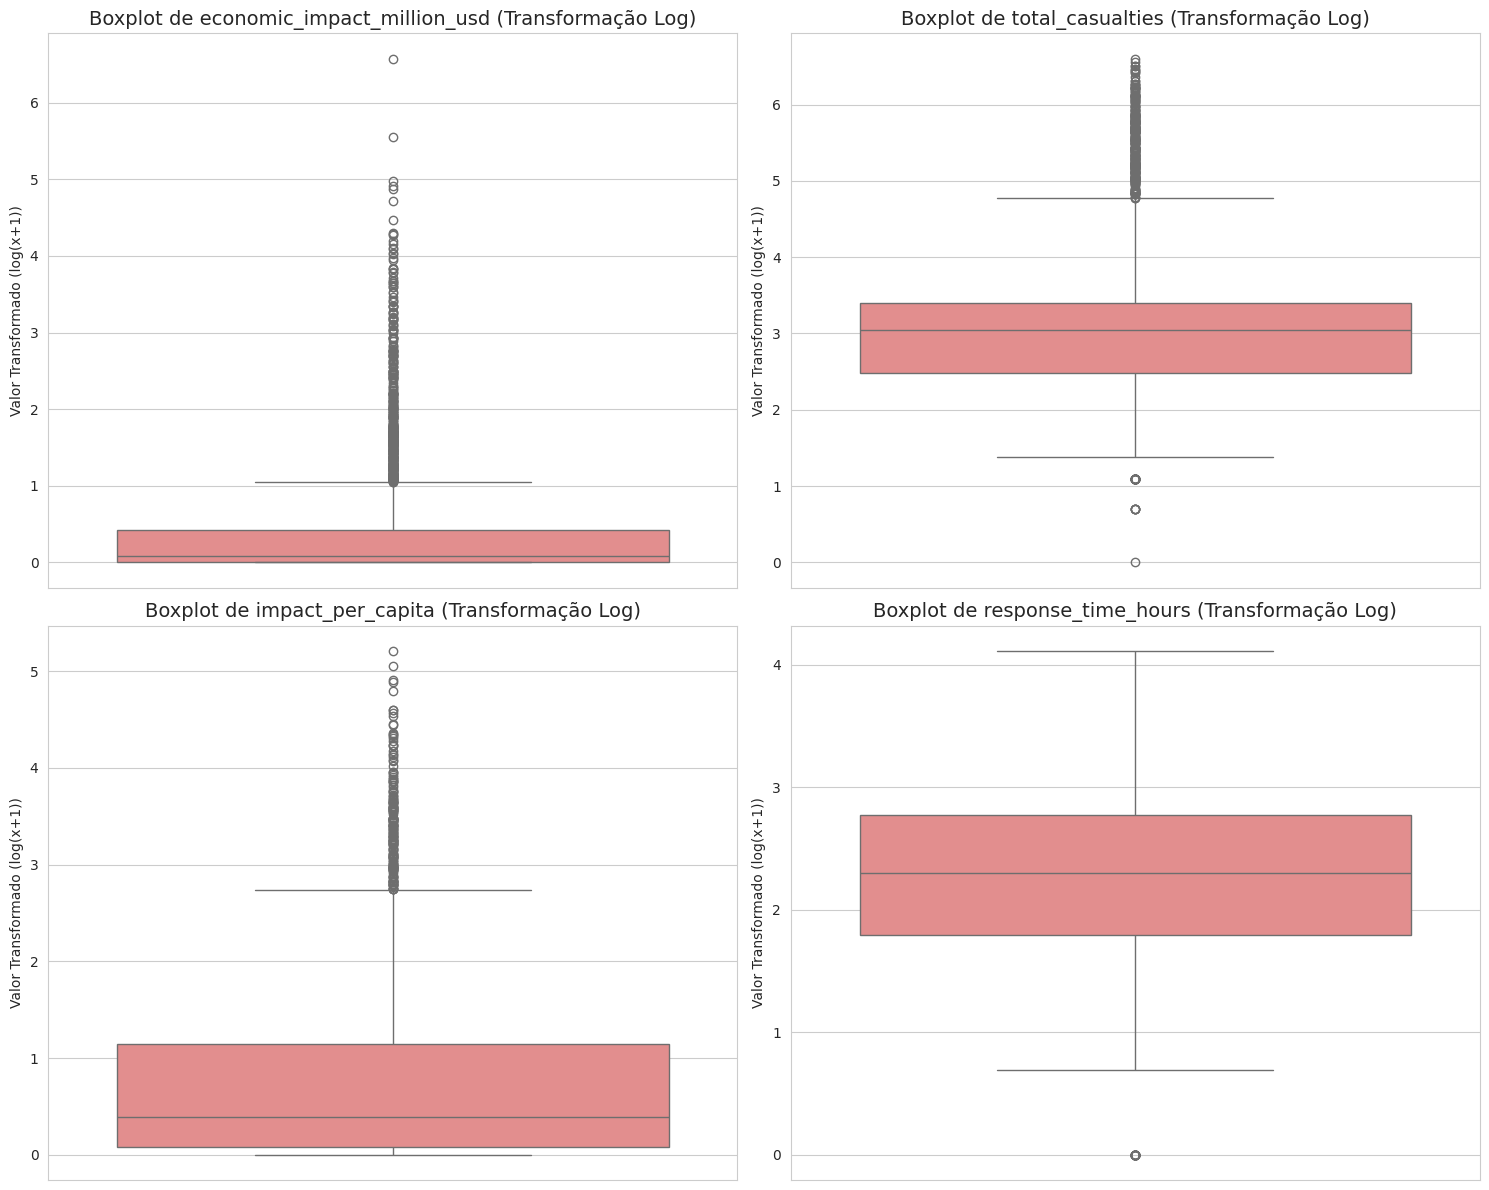

In [ ]:
# Variáveis críticas para checagem e tratamento de outliers
cols_outliers = [
    'economic_impact_million_usd',
    'total_casualties',
    'impact_per_capita',
    'response_time_hours'
]

# A transformação log(x) é indefinida para x <= 0.
# Uma prática comum é usar log(x + 1) para lidar com zeros,
# garantindo que o logaritmo de zero (que é 1 após a soma) seja 0.
for col in cols_outliers:
    # Cria uma nova coluna com o sufixo '_log'
    # Usa np.log1p para aplicar log(1 + x) de forma robusta
    df[f'{col}_log'] = np.log1p(df[col])

# Lista das novas colunas transformadas
cols_log = [f'{col}_log' for col in cols_outliers]

# 2. Plotar os boxplots das variáveis transformadas

# Configuração para múltiplos gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten() # Transforma a matriz 2x2 em uma lista para iterar

for i, col_log in enumerate(cols_log):
    sns.boxplot(y=df[col_log], ax=axes[i], color='lightcoral')

    # O título agora reflete a transformação
    original_col = col_log.replace('_log', '')
    axes[i].set_title(f'Boxplot de {original_col} (Transformação Log)', fontsize=14)
    axes[i].set_ylabel('Valor Transformado (log(x+1))')

plt.tight_layout()
plt.show()

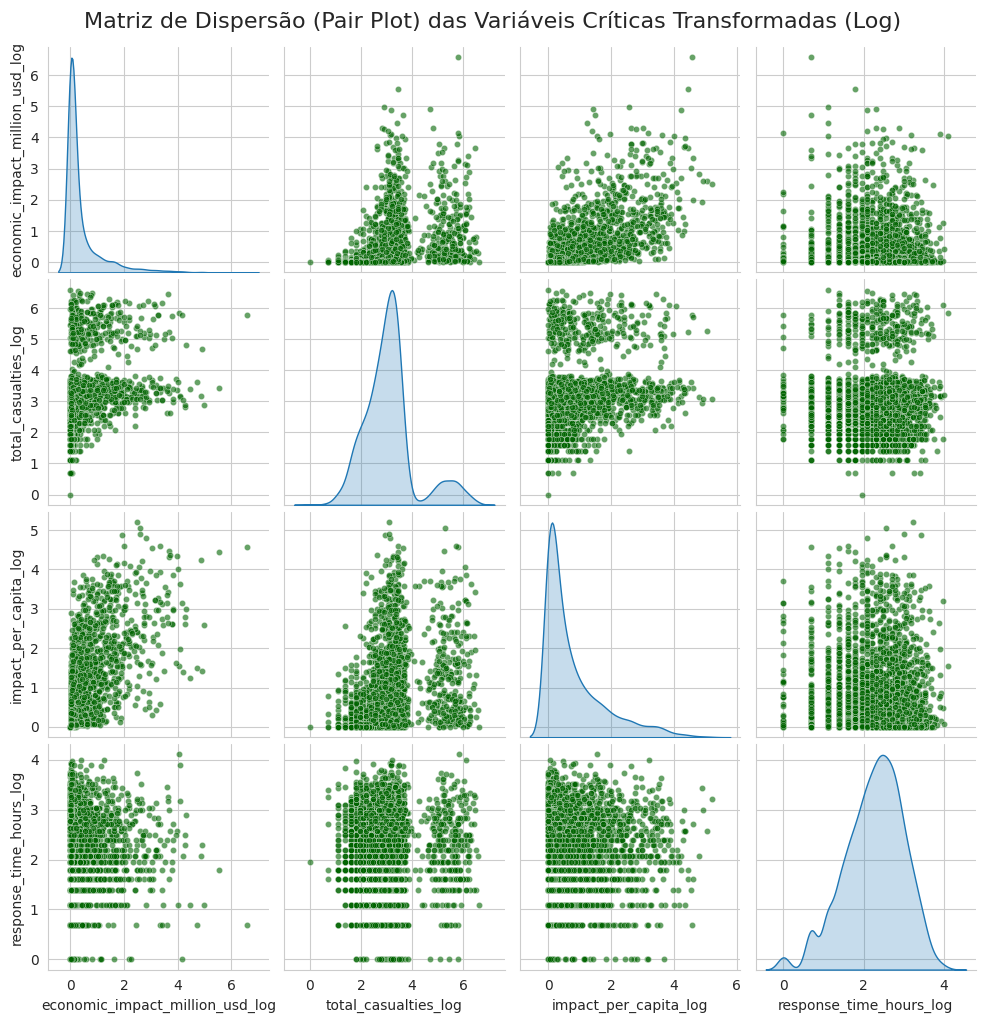

In [ ]:
# Lista apenas com as colunas transformadas que queremos plotar
cols_for_pairplot = [
    'economic_impact_million_usd_log',
    'total_casualties_log',
    'impact_per_capita_log',
    'response_time_hours_log'
]


# Gerar o Pair Plot
sns.pairplot(
    df[cols_for_pairplot],
    diag_kind='kde', # Usa Estimativa de Densidade de Kernel na diagonal
    plot_kws={'alpha': 0.6, 's': 20, 'color': 'darkgreen'} # Opções para os scatter plots
)

plt.suptitle(
    'Matriz de Dispersão (Pair Plot) das Variáveis Críticas Transformadas (Log)',
    y=1.02, # Posição do título
    fontsize=16
)
plt.show()

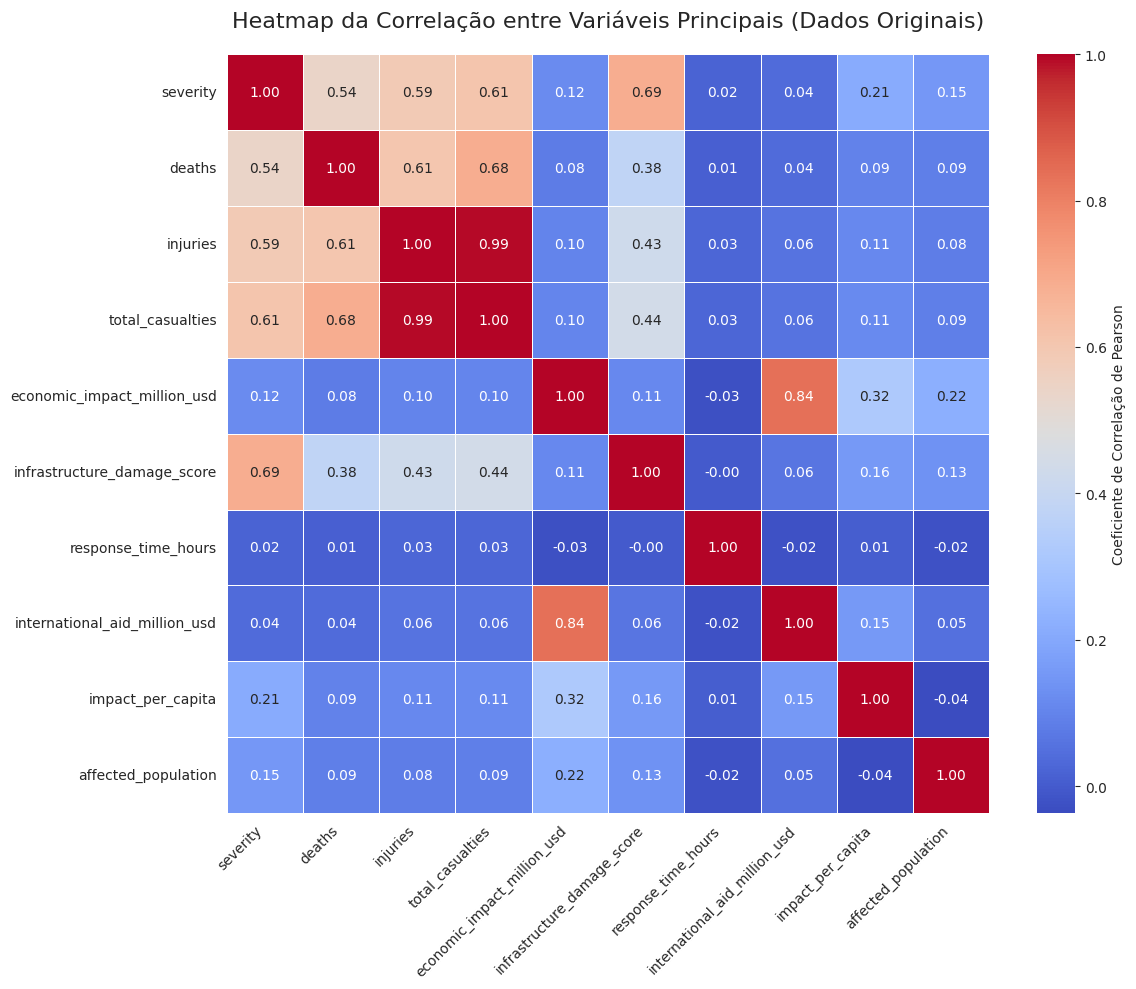

In [ ]:
# Carregar o DataFrame
# (Usando df_completo como referência, que deve estar definido no seu ambiente Colab)
try:
    # Tenta carregar o arquivo novamente por segurança
    df_completo = pd.read_csv('global_climate_events_economic_impact_2020_2025.csv')
except:
    # Em caso de erro, assume que 'df_completo' já foi carregado
    print("Aviso: Falha ao recarregar o arquivo CSV. Usando o DataFrame existente.")

# 1. Definir as colunas numéricas relevantes para a correlação
# Excluindo IDs, datas e variáveis categóricas
colunas_para_heatmap = [
    'severity',
    'deaths',
    'injuries',
    'total_casualties',
    'economic_impact_million_usd',
    'infrastructure_damage_score',
    'response_time_hours',
    'international_aid_million_usd',
    'impact_per_capita',
    'affected_population'
]

# Selecionar as colunas e garantir que apenas dados numéricos sejam processados
df_correlacao = df_completo[colunas_para_heatmap].select_dtypes(include=np.number).copy()

# 2. Calcular a Matriz de Correlação
# O método .corr() calcula a correlação de Pearson por padrão
correlation_matrix = df_correlacao.corr()

# 3. Gerar o Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,              # Mostrar o valor da correlação
    fmt=".2f",               # Formato com duas casas decimais
    cmap='coolwarm',         # Esquema de cores (Vermelho para positivo, Azul para negativo)
    linewidths=.5,           # Linhas para separar as células
    cbar_kws={'label': 'Coeficiente de Correlação de Pearson'}
)

plt.title(
    'Heatmap da Correlação entre Variáveis Principais (Dados Originais)',
    fontsize=16,
    pad=20
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1129631370.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impacto_medio.index, y=impacto_medio.values, palette="viridis")


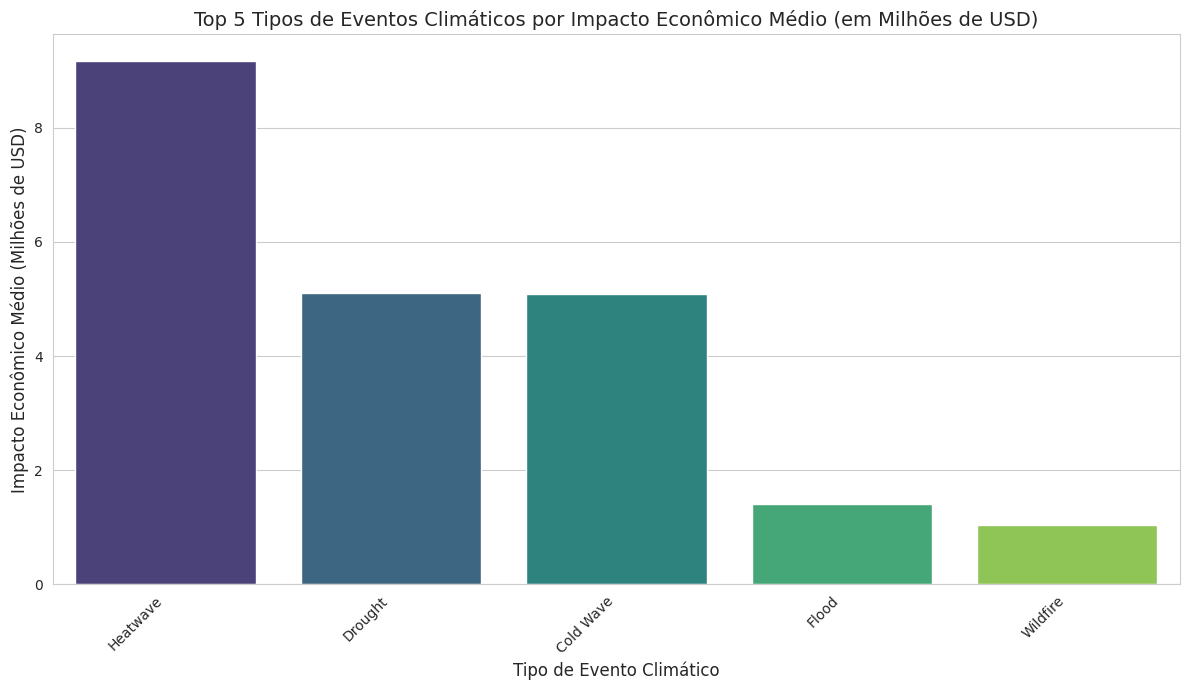

In [ ]:
# Calcular o impacto econômico MÉDIO por tipo de evento
impacto_medio = df.groupby('event_type')['economic_impact_million_usd'].mean().sort_values(ascending=False).head(5)

# Gerar o gráfico
plt.figure(figsize=(12, 7))
sns.barplot(x=impacto_medio.index, y=impacto_medio.values, palette="viridis")

# Adicionar rótulos e título
plt.title('Top 5 Tipos de Eventos Climáticos por Impacto Econômico Médio (em Milhões de USD)', fontsize=14)
plt.xlabel('Tipo de Evento Climático', fontsize=12)
plt.ylabel('Impacto Econômico Médio (Milhões de USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

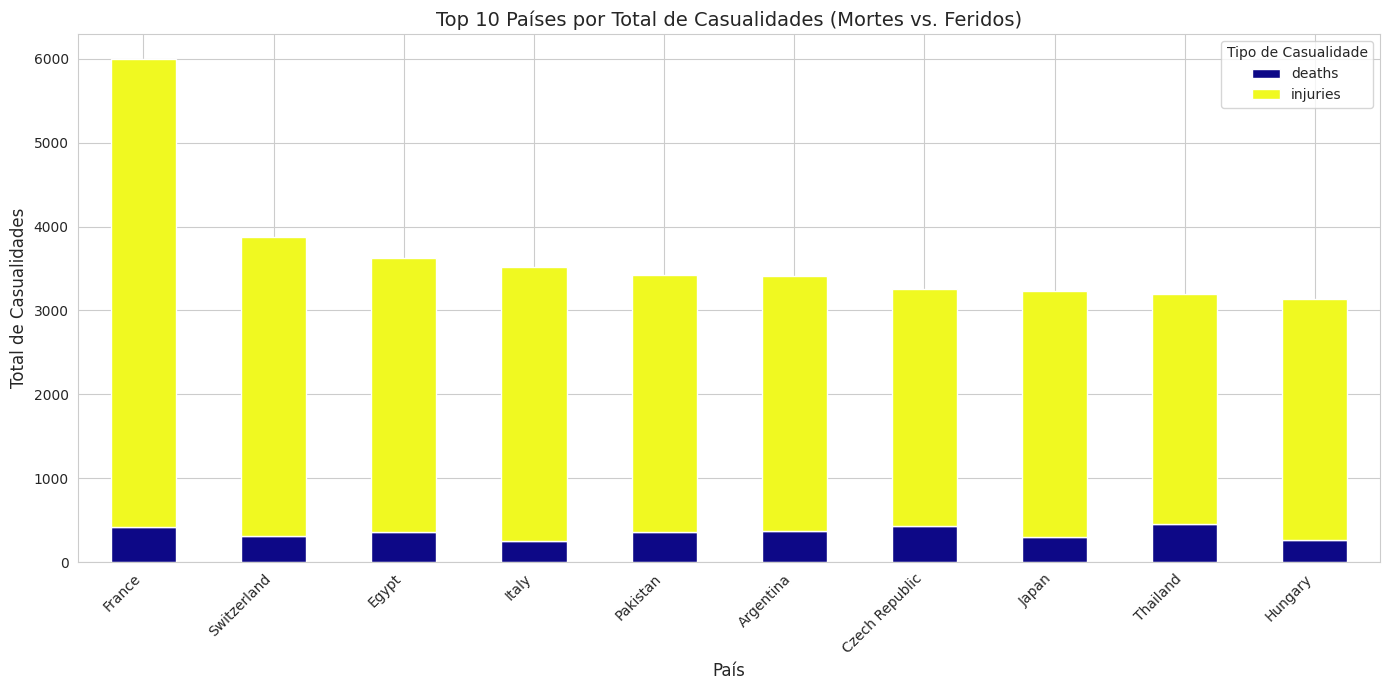

In [ ]:
# Agrupar por país e somar Mortes, Feridos e Total de Casualidades
casualidades_por_pais = df.groupby('country')[['deaths', 'injuries', 'total_casualties']].sum().sort_values(by='total_casualties', ascending=False).head(10)

# Preparar os dados para o gráfico de barras empilhadas (apenas mortes e feridos)
casualidades_plot = casualidades_por_pais[['deaths', 'injuries']]

# Gerar o gráfico
casualidades_plot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='plasma')

# Adicionar rótulos e título
plt.title('Top 10 Países por Total de Casualidades (Mortes vs. Feridos)', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Total de Casualidades', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Casualidade')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1146187777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['severity'] = df['severity'].astype('category')
/tmp/ipython-input-1146187777.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='severity', y='response_time_hours', data=df, palette="coolwarm", order=sorted(df['severity'].unique()))


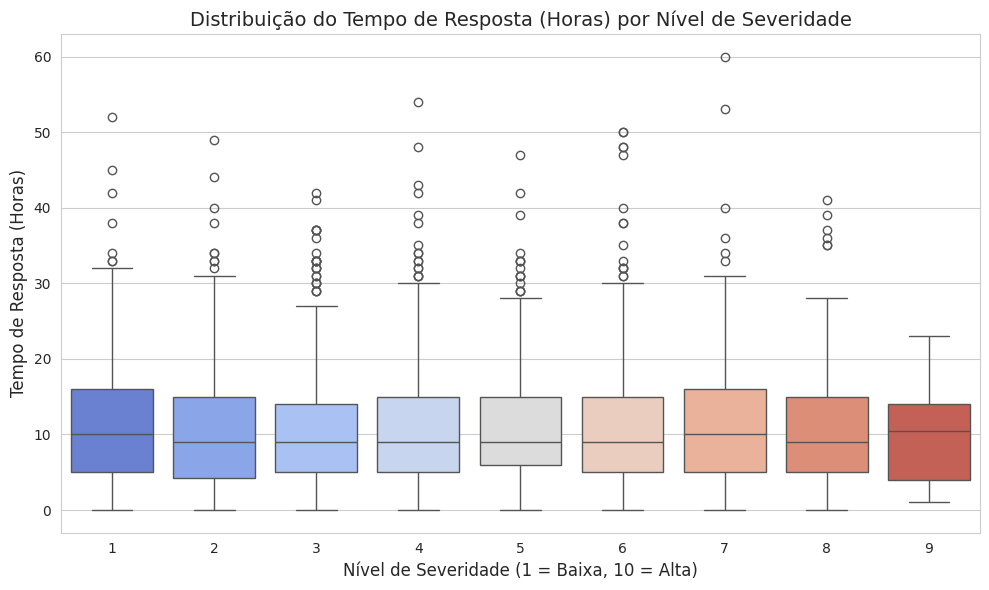

In [ ]:
# Garantir que a severidade é tratada como categoria para ordenar o Boxplot
df['severity'] = df['severity'].astype('category')

# Gerar o Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='severity', y='response_time_hours', data=df, palette="coolwarm", order=sorted(df['severity'].unique()))

# Adicionar rótulos e título
plt.title('Distribuição do Tempo de Resposta (Horas) por Nível de Severidade', fontsize=14)
plt.xlabel('Nível de Severidade (1 = Baixa, 10 = Alta)', fontsize=12)
plt.ylabel('Tempo de Resposta (Horas)', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2794413745.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


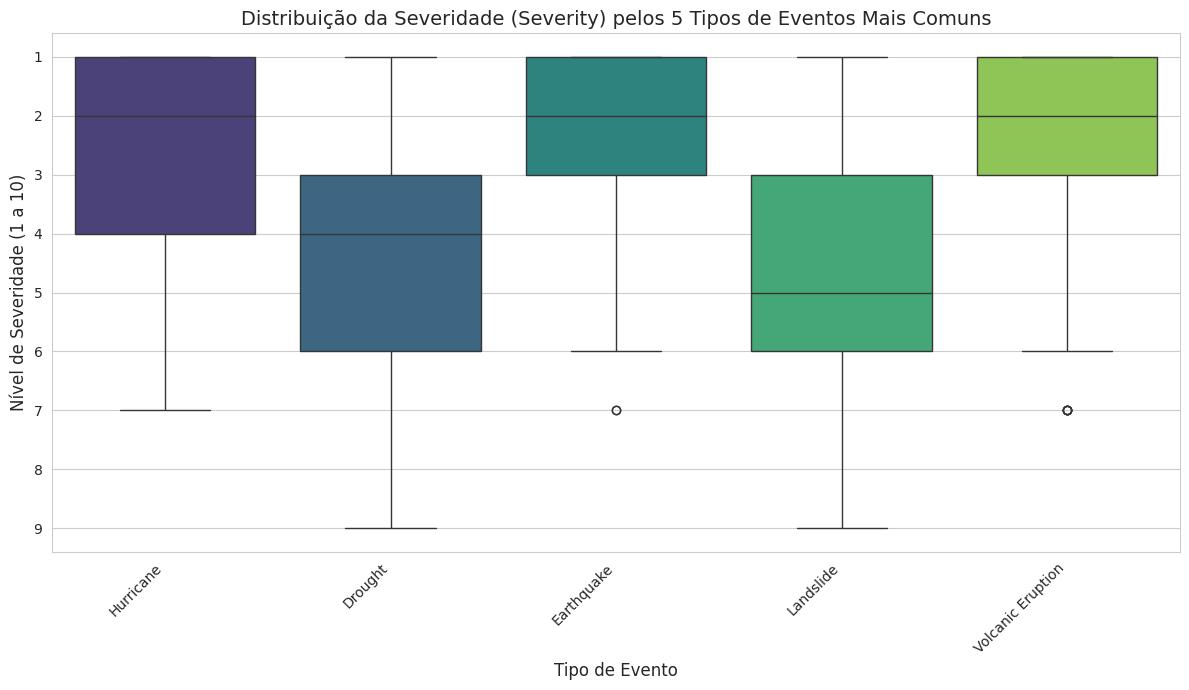

In [ ]:
# 1. Identificar os 5 tipos de eventos mais frequentes para focar a visualização
top_5_events = df['event_type'].value_counts().head(5).index

# 2. Filtrar o DataFrame para incluir apenas esses 5 eventos
df_top_5 = df[df['event_type'].isin(top_5_events)]

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_top_5,
    x='event_type',
    y='severity',
    palette='viridis'
)

# Adicionar rótulos e título
plt.title('Distribuição da Severidade (Severity) pelos 5 Tipos de Eventos Mais Comuns', fontsize=14)
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Nível de Severidade (1 a 10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

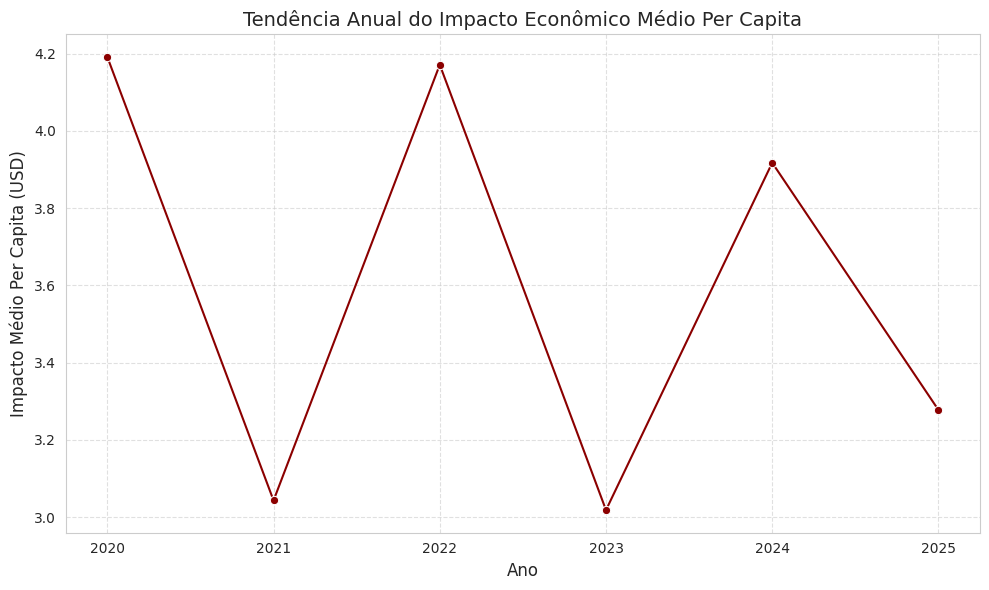

In [ ]:
# Calcular o impacto per capita MÉDIO por ano
impacto_anual = df.groupby(df['date'].dt.year)['impact_per_capita'].mean()

# Gerar o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(x=impacto_anual.index, y=impacto_anual.values, marker='o', color='darkred')

# Adicionar rótulos e título
plt.title('Tendência Anual do Impacto Econômico Médio Per Capita', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Impacto Médio Per Capita (USD)', fontsize=12)
plt.xticks(impacto_anual.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()